In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [3]:
#read and examine the data
df = pd.read_csv('data/NFWBS_PUF_2016_data.csv')

#Map values
df = df.replace({"sample":{
  1: "General population",
  2: "Age 62+ oversample",
  3: "Race/ethnicity and poverty oversample"
},
"fpl":{
  1: "<100% FPL",
  2: "100%-199% FPL",
  3: "200%+ FPL"
},
"SWB_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"FWBscore":{
  -4: "Response not written to database",
  -1: "Refused"
},
"FWB1_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_5":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_6":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB2_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FSscore":{
  -1: "Refused"
},
"FS1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_4":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_5":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_6":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_7":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS2_1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_2":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_3":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBKNOWL1":{
  -1: "Refused",
  1: "1 - Very low",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 - Very high"
},
"ACT1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"ACT1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FINGOALS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"PROPPLAN_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_4":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MANAGE1_1":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_2":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_3":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_4":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SAVEHABIT":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"FRUGALITY":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"AUTOMATED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"AUTOMATED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"ASK1_1":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"ASK1_2":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBNUMERACY2":{
  -1: "Refused",
  1: "1 - Always prefer words",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Always prefer numbers"
},
"SUBNUMERACY1":{
  -1: "Refused",
  1: "1 - Not good at all",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Extremely good"
},
"CHANGEABLE":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"GOALCONF":{
  -1: "Refused",
  1: "Not at all confident",
  2: "Not very confident",
  3: "Somewhat confident",
  4: "Very confident"
},
"FINKNOWL1":{
  -1: "Refused",
  1: "More than $102",
  2: "Exactly $102",
  3: "Less than $102"
},
"FINKNOWL2":{
  -1: "Refused",
  1: "More than today",
  2: "Exactly the same",
  3: "Less than today"
},
"FINKNOWL3":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"FK1correct":{
  0: "No",
  1: "Yes"
},
"FK2correct":{
  0: "No",
  1: "Yes"
},
"FK3correct":{
  0: "No",
  1: "Yes"
},
"KHKNOWL1":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL2":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL3":{
  -1: "Refused",
  1: "Increase",
  2: "Decrease",
  3: "Stay the same"
},
"KHKNOWL4":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL5":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL6":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL7":{
  -1: "Refused",
  1: "Less than 5 years",
  2: "Between 5 and 10 years",
  3: "Between 10 and 15 years",
  4: "Never, you will continue to be in debt"
},
"KHKNOWL8":{
  -1: "Refused",
  1: "They will rise",
  2: "They will fall",
  3: "They will stay the same",
  4: "There is no relationship between bond prices and the interest rate"
},
"KHKNOWL9":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KH1correct":{
  0: "No",
  1: "Yes"
},
"KH2correct":{
  0: "No",
  1: "Yes"
},
"KH3correct":{
  0: "No",
  1: "Yes"
},
"KH4correct":{
  0: "No",
  1: "Yes"
},
"KH5correct":{
  0: "No",
  1: "Yes"
},
"KH6correct":{
  0: "No",
  1: "Yes"
},
"KH7correct":{
  0: "No",
  1: "Yes"
},
"KH8correct":{
  0: "No",
  1: "Yes"
},
"KH9correct":{
  0: "No",
  1: "Yes"
},
"ENDSMEET":{
  -1: "Refused",
  1: "Not at all difficult",
  2: "Somewhat difficult",
  3: "Very difficult"
},
"HOUSING":{
  -1: "Refused",
  1: "I own my home",
  2: "I rent",
  3: "I do not currently own or rent"
},
"LIVINGARRANGEMENT":{
  -1: "Refused",
  1: "I am the only adult in the household",
  2: "I live with my spouse/partner/significant other",
  3: "I live in my parents home",
  4: "I live with other family, friends, or roommates",
  5: "Some other arrangement"
},
"HOUSERANGES":{
  -1: "Refused",
  1: "Less than $300",
  2: "$300-499",
  3: "$500-749",
  4: "$750-999",
  5: "$1,000-1,499",
  6: "$1,500-1,999",
  7: "$2,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"IMPUTATION_FLAG":{
  0: "Not imputed",
  1: "Imputed"
},
"VALUERANGES":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $150,000",
  2: "$150,000-249,999",
  3: "$250,000-399,999",
  4: "$400,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"MORTGAGE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $50,000",
  2: "$50,000-199,999",
  3: "$200,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"SAVINGSRANGES":{
  -1: "Refused",
  1: "0",
  2: "$1-99",
  3: "$100-999",
  4: "$1,000-4,999",
  5: "$5,000-19,999",
  6: "$20,000-74,999",
  7: "$75,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"PRODHAVE_1":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_2":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_3":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_4":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_5":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_6":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_7":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_8":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_9":{
  0: "No",
  1: "Yes"
},
"PRODUSE_1":{
  0: "No",
  1: "Yes"
},
"PRODUSE_2":{
  0: "No",
  1: "Yes"
},
"PRODUSE_3":{
  0: "No",
  1: "Yes"
},
"PRODUSE_4":{
  0: "No",
  1: "Yes"
},
"PRODUSE_5":{
  0: "No",
  1: "Yes"
},
"PRODUSE_6":{
  0: "No",
  1: "Yes"
},
"CONSPROTECT1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often"
},
"CONSPROTECT2":{
  -1: "Refused",
  1: "Not at all familiar",
  2: "Somewhat familiar",
  3: "Very familiar"
},
"CONSPROTECT3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"EARNERS":{
  -1: "Refused",
  1: "One",
  2: "Two",
  3: "More than two"
},
"VOLATILITY":{
  -1: "Refused",
  1: "Roughly the same each month",
  2: "Roughly the same most months, but some unusually high or low months during the year",
  3: "Often varies quite a bit from one month to the next"
},
"SNAP":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"MATHARDSHIP_1":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_2":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_3":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_4":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_5":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_6":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"COLLECT":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"REJECTED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"REJECTED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"ABSORBSHOCK":{
  -1: "Refused",
  1: "I am certain I could not come up with $2,000",
  2: "I could probably not come up with $2,000",
  3: "I could probably come up with $2,000",
  4: "I am certain I could come up with the full $2,000",
  8: "I dont know"
},
"BENEFITS_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FRAUD2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"COVERCOSTS":{
  -1: "Refused",
  1: "Use savings or sell something you own",
  2: "Cut back or do without",
  3: "Earn more money",
  4: "Borrow money"
},
"BORROW_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BORROW_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SHOCKS_1":{
  0: "No",
  1: "Yes"
},
"SHOCKS_2":{
  0: "No",
  1: "Yes"
},
"SHOCKS_3":{
  0: "No",
  1: "Yes"
},
"SHOCKS_4":{
  0: "No",
  1: "Yes"
},
"SHOCKS_5":{
  0: "No",
  1: "Yes"
},
"SHOCKS_6":{
  0: "No",
  1: "Yes"
},
"SHOCKS_7":{
  0: "No",
  1: "Yes"
},
"SHOCKS_8":{
  0: "No",
  1: "Yes"
},
"SHOCKS_9":{
  0: "No",
  1: "Yes"
},
"SHOCKS_10":{
  0: "No",
  1: "Yes"
},
"SHOCKS_11":{
  0: "No",
  1: "Yes"
},
"SHOCKS_12":{
  0: "No",
  1: "Yes"
},
"MANAGE2":{
  -1: "Refused",
  1: "Someone else takes care of all or most money matters in my household.",
  2: "Someone else and I take care of money matters in my household about the same.",
  3: "I take care of all or most money matters in my household."
},
"PAIDHELP":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"HSLOC":{
  -1: "Refused",
  1: "U.S. and territories",
  2: "Outside the U.S.",
  8: "I cant recall"
},
"PAREDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"FINSOC2_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_6":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_7":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"OBJNUMERACY1":{
  -1: "Refused",
  1: "1%",
  2: "10%",
  3: "5%"
},
"ON2correct":{
  0: "No",
  1: "Yes"
},
"ON1correct":{
  0: "No",
  1: "Yes"
},
"MATERIALISM_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"CONNECT":{
  -1: "Refused"
},
"HEALTH":{
  -1: "Refused",
  1: "Poor",
  2: "Fair",
  3: "Good",
  4: "Very good",
  5: "Excellent"
},
"SCFHORIZON":{
  -1: "Refused",
  1: "The next few months",
  2: "The next year",
  3: "The next few years",
  4: "The next 5 to 10 years",
  5: "Longer than 10 years"
},
"DISCOUNT":{
  -1: "Refused",
  1: "$816 now",
  2: "$860 in three months"
},
"MEMLOSS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"DISTRESS":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"SELFCONTROL_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"OUTLOOK_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"OUTLOOK_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"INTERCONNECTIONS_1":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_2":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_3":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_4":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_5":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_6":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_7":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_8":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_9":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_10":{
  0: "No",
  1: "Yes"
},
"PEM":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"HOUSESAT":{
  -1: "Refused",
  1: "Not at all satisfied",
  2: "Not very satisfied",
  3: "Somewhat satisfied",
  4: "Very satisfied"
},
"SOCSEC1":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SOCSEC2":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70 and above"
},
"SOCSEC3":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  61: "61 and below",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71 and above"
},
"LIFEEXPECT":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7",
  8: "8",
  9: "9",
  10: "10",
  11: "11",
  12: "12",
  15: "15",
  20: "20",
  22: "22",
  24: "24",
  25: "25",
  26: "26",
  28: "28",
  29: "29",
  30: "30",
  33: "33",
  35: "35",
  36: "36",
  37: "37",
  40: "40",
  41: "41",
  42: "42",
  43: "43",
  44: "44",
  45: "45",
  47: "47",
  50: "50",
  52: "52",
  54: "54",
  55: "55",
  56: "56",
  57: "57",
  59: "59",
  60: "60",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71",
  72: "72",
  73: "73",
  75: "75",
  76: "76",
  77: "77",
  78: "78",
  79: "79",
  80: "80",
  81: "81",
  82: "82",
  83: "83",
  84: "84",
  85: "85",
  86: "86",
  87: "87",
  88: "88",
  89: "89",
  90: "90",
  91: "91",
  92: "92",
  93: "93",
  94: "94",
  95: "95",
  96: "96",
  97: "97",
  98: "98",
  99: "99",
  100: "100"
},
"HHEDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"KIDS_NoChildren":{
  -1: "Refused",
  0: "Respondent financially supports children",
  1: "I have no children that I financially support"
},
"KIDS_1":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_2":{
  -3: "Invalid Response",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_3":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_4":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"EMPLOY":{
  1: "Self-employed",
  2: "Work full-time for an employer or the military",
  3: "Work part-time for an employer or the military",
  4: "Homemaker",
  5: "Full-time student",
  6: "Permanently sick, disabled or unable to work",
  7: "Unemployed or temporarily laid off",
  8: "Retired",
  99: "Refused"
},
"EMPLOY1_1":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_2":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_3":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_4":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_5":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_6":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_7":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_8":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_9":{
  0: "No",
  1: "Yes"
},
"RETIRE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Earlier than planned",
  2: "About when planned",
  3: "Later than planned"
},
"MILITARY":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"Military_Status":{
  -1: "Refused",
  1: "Active military (active, reserve, natl guard)",
  2: "Veteran (veteran or retired)",
  3: "Spouse/dependent Active",
  4: "Spouse/dependent Veteran",
  5: "Neither Active nor Veteran"
},
"agecat":{
  1: "18-24",
  2: "25-34",
  3: "35-44",
  4: "45-54",
  5: "55-61",
  6: "62-69",
  7: "70-74",
  8: "75+"
},
"generation":{
  1: "Pre-Boomer",
  2: "Boomer",
  3: "Gen X",
  4: "Millennial"
},
"PPEDUC":{
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"PPETHM":{
  1: "White, Non-Hispanic",
  2: "Black, Non-Hispanic",
  3: "Other, Non-Hispanic",
  4: "Hispanic"
},
"PPGENDER":{
  1: "Male",
  2: "Female"
},
"PPHHSIZE":{
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5+"
},
"PPINCIMP":{
  1: "Less than $20,000",
  2: "$20,000 to $29,999",
  3: "$30,000 to $39,999",
  4: "$40,000 to $49,999",
  5: "$50,000 to $59,999",
  6: "$60,000 to $74,999",
  7: "$75,000 to $99,999",
  8: "$100,000 to $149,999",
  9: "$150,000 or more"
},
"PPMARIT":{
  1: "Married",
  2: "Widowed",
  3: "Divorced/Separated",
  4: "Never married",
  5: "Living with partner"
},
"PPMSACAT":{
  0: "Non-Metro",
  1: "Metro"
},
"PPREG4":{
  1: "Northeast",
  2: "Midwest",
  3: "South",
  4: "West"
},
"PPREG9":{
  1: "New England",
  2: "Mid-Atlantic",
  3: "East-North Central",
  4: "West-North Central",
  5: "South Atlantic",
  6: "East-South Central",
  7: "West-South Central",
  8: "Mountain",
  9: "Pacific"
},
"PPT01":{
  0: "0",
  1: "1+"
},
"PPT25":{
  0: "0",
  1: "1+"
},
"PPT612":{
  0: "0",
  1: "1+"
},
"PPT1317":{
  0: "0",
  1: "1+"
},
"PPT18OV":{
  1: "1",
  2: "2",
  3: "3",
  4: "4+"
},
"PCTLT200FPL":{
  -5: "County is not known",
  0: "Less than 40% of county population below 200% of poverty level",
  1: "40% or more of county population below 200% of poverty level"
}})

In [4]:
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,Age 62+ oversample,200%+ FPL,5,5,6,55,Somewhat,Somewhat,Somewhat,...,Metro,West,Mountain,0,0,0,0,1,Less than 40% of county population below 200% ...,0.367292
1,7740,General population,200%+ FPL,6,6,6,51,Very little,Very little,Somewhat,...,Metro,Midwest,East-North Central,0,0,0,0,2,Less than 40% of county population below 200% ...,1.327561
2,13699,General population,200%+ FPL,4,3,4,49,Somewhat,Somewhat,Somewhat,...,Metro,West,Pacific,0,0,0,1+,2,40% or more of county population below 200% of...,0.835156
3,7267,General population,200%+ FPL,6,6,6,49,Somewhat,Somewhat,Somewhat,...,Metro,South,West-South Central,0,0,0,0,1,Less than 40% of county population below 200% ...,1.410871
4,7375,General population,200%+ FPL,4,4,4,49,Somewhat,Somewhat,Somewhat,...,Metro,Midwest,West-North Central,0,0,1+,0,4+,40% or more of county population below 200% of...,4.260668


In [7]:
df.describe()


,PUF_ID,LMscore,KHscore,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,2.506256,-0.056935,1.000000
std,1967.854493,0.755215,0.814936,0.585406
min,7123.000000,0.000000,-2.053000,0.165567
25%,9235.250000,2.000000,-0.570000,0.600582
50%,10901.500000,3.000000,-0.188000,0.845213
75%,12570.750000,3.000000,0.712000,1.251415
max,14400.000000,3.000000,1.267000,6.638674


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(2), object(213)
memory usage: 10.6+ MB


<AxesSubplot:xlabel='samples', ylabel='frequency'>

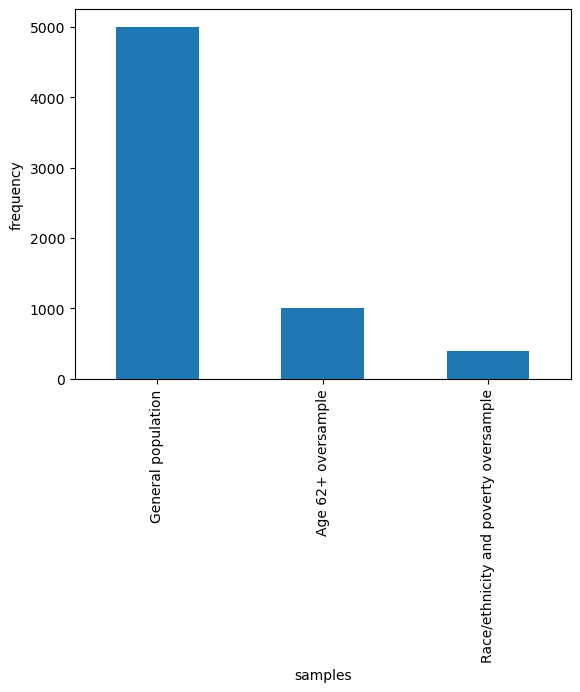

In [102]:
#understand the sample frequency because I intend just to use General Population samples
df['sample'].value_counts().plot(kind='bar', xlabel='samples', ylabel='frequency')

In [103]:
general_population = df.loc[df['sample'] == 'General population']

In [104]:
general_population.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
1,7740,General population,200%+ FPL,6,6,6,51,Very little,Very little,Somewhat,...,Metro,Midwest,East-North Central,0,0,0,0,2,Less than 40% of county population below 200% ...,1.327561
2,13699,General population,200%+ FPL,4,3,4,49,Somewhat,Somewhat,Somewhat,...,Metro,West,Pacific,0,0,0,1+,2,40% or more of county population below 200% of...,0.835156
3,7267,General population,200%+ FPL,6,6,6,49,Somewhat,Somewhat,Somewhat,...,Metro,South,West-South Central,0,0,0,0,1,Less than 40% of county population below 200% ...,1.410871
4,7375,General population,200%+ FPL,4,4,4,49,Somewhat,Somewhat,Somewhat,...,Metro,Midwest,West-North Central,0,0,1+,0,4+,40% or more of county population below 200% of...,4.260668
5,10910,General population,200%+ FPL,5,7 Strongly agree,5,67,Completely,Not at all,Not at all,...,Metro,Midwest,East-North Central,0,0,0,0,2,Less than 40% of county population below 200% ...,0.760061


In [16]:
general_population.describe()

,PUF_ID,LMscore,KHscore,finalwt
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,10759.086400,2.510000,-0.061432,1.063008
std,1997.696045,0.757902,0.810538,0.600244
min,7123.000000,0.000000,-2.053000,0.191141
25%,9047.750000,2.000000,-0.570000,0.655305
50%,10699.500000,3.000000,-0.188000,0.925416
75%,12483.250000,3.000000,0.712000,1.312360
max,14399.000000,3.000000,1.267000,6.638674


In [105]:
#drop na
general_population.dropna()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
1,7740,General population,200%+ FPL,6,6,6,51,Very little,Very little,Somewhat,...,Metro,Midwest,East-North Central,0,0,0,0,2,Less than 40% of county population below 200% ...,1.327561
2,13699,General population,200%+ FPL,4,3,4,49,Somewhat,Somewhat,Somewhat,...,Metro,West,Pacific,0,0,0,1+,2,40% or more of county population below 200% of...,0.835156
3,7267,General population,200%+ FPL,6,6,6,49,Somewhat,Somewhat,Somewhat,...,Metro,South,West-South Central,0,0,0,0,1,Less than 40% of county population below 200% ...,1.410871
4,7375,General population,200%+ FPL,4,4,4,49,Somewhat,Somewhat,Somewhat,...,Metro,Midwest,West-North Central,0,0,1+,0,4+,40% or more of county population below 200% of...,4.260668
5,10910,General population,200%+ FPL,5,7 Strongly agree,5,67,Completely,Not at all,Not at all,...,Metro,Midwest,East-North Central,0,0,0,0,2,Less than 40% of county population below 200% ...,0.760061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,12353,General population,200%+ FPL,5,7 Strongly agree,3,62,Somewhat,Somewhat,Somewhat,...,Metro,South,South Atlantic,0,0,0,0,2,Less than 40% of county population below 200% ...,1.745759
6362,8120,General population,200%+ FPL,3,5,6,43,Very little,Very little,Somewhat,...,Metro,West,Pacific,0,0,0,1+,4+,Less than 40% of county population below 200% ...,1.395414
6386,9431,General population,200%+ FPL,5,7 Strongly agree,7 Strongly agree,45,Somewhat,Somewhat,Very well,...,Metro,South,South Atlantic,0,0,0,0,2,Less than 40% of county population below 200% ...,0.432273
6391,8709,General population,200%+ FPL,5,6,6,59,Somewhat,Very well,Somewhat,...,Metro,Northeast,Mid-Atlantic,0,0,0,0,2,Less than 40% of county population below 200% ...,1.136270


After reading the data use guide I plan to use the following columns to complete my analysis

FWBscore: CFPB Financial Well-Being Scale Score (the target variable)
FSscore: CFPB Financial Skill Scale score (a measure of someone's financial skill by the CFPB)
LMscore: Lusardi and Mitchell scale score (a measure of someone's financial literacy)
FK1correct to FK3correct
KH1correct to KH9correct
ON2correct and ON1correct
HOUSERANGES
VALUERANGES
MORTGAGE
SAVINGSRANGES
HSLOC
PAREDUC
SOCSEC2-> May not include
SOCSEC3
HHEDUC
KIDS_NoChildren
KIDS_1 to KIDS_4
EMPLOY
MILITARY
agecat
generation (may not use a representation of the generation)
PPEDUC
PPETHM
PPHHSIZE
PPINCIMP
PPMARIT
PCTLT200FPL

In [107]:


#gen_pop_key_columns = general_population[["FWBscore", "FSscore","LMscore",
#                                          "FK1correct","FK2correct","FK3correct",
 #                                         "KH1correct","KH2correct","KH3correct",
 #                                        "KH4correct","KH5correct","KH6correct",
  #                                       "KH7correct","KH8correct","KH9correct",
  #                                       "ON1correct","ON2correct","HOUSERANGES",
   #                                      "VALUERANGES","MORTGAGE","SAVINGSRANGES",
    #                                     "HSLOC","PAREDUC","SOCSEC3","HHEDUC",
    #                                      "KIDS_NoChildren","EMPLOY","MILITARY",
     #                                     "agecat","PPEDUC","PPETHM","PPHHSIZE",
     #                                     "PPINCIMP","PPMARIT","PCTLT200FPL","ENDSMEET","finalwt"]]
    
    
gen_pop_key_columns = general_population[["FWBscore", "FSscore","LMscore","ENDSMEET","HOUSING","LIVINGARRANGEMENT",
                                         "HOUSERANGES","VALUERANGES","MORTGAGE","SAVINGSRANGES","EARNERS"
                                          ,"VOLATILITY","SNAP","ABSORBSHOCK","COVERCOSTS","PAIDHELP"
                                          ,"HSLOC","PAREDUC","HEALTH","DISTRESS","HHEDUC","EMPLOY"
                                          ,"Military_Status","agecat","generation","PPEDUC","PPETHM"
                                          ,"PPGENDER","PPHHSIZE","PPINCIMP","PPMARIT"]]

In [108]:
gen_pop_key_columns.head()

,FWBscore,FSscore,LMscore,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,VALUERANGES,MORTGAGE,SAVINGSRANGES,...,EMPLOY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT
1,51,43,3,Somewhat difficult,I own my home,I live with my spouse/partner/significant other,$750-999,"$150,000-249,999","$50,000-199,999",$1-99,...,Work full-time for an employer or the military,Neither Active nor Veteran,35-44,Gen X,High school degree/GED,"White, Non-Hispanic",Male,2,"$60,000 to $74,999",Divorced/Separated
2,49,42,3,Not at all difficult,I own my home,I live with my spouse/partner/significant other,$500-749,"$250,000-399,999","$50,000-199,999","$1,000-4,999",...,Work full-time for an employer or the military,Neither Active nor Veteran,35-44,Gen X,Some college/Associate,"Black, Non-Hispanic",Male,3,"$60,000 to $74,999",Divorced/Separated
3,49,42,2,Refused,Refused,Refused,Prefer not to say,Question not asked because respondent not in i...,Question not asked because respondent not in i...,Refused,...,Refused,Refused,35-44,Gen X,High school degree/GED,"White, Non-Hispanic",Male,1,"$100,000 to $149,999",Divorced/Separated
4,49,42,1,Somewhat difficult,I rent,I live in my parents home,$300-499,Question not asked because respondent not in i...,Question not asked because respondent not in i...,I dont know,...,Work full-time for an employer or the military,Neither Active nor Veteran,25-34,Millennial,High school degree/GED,"Other, Non-Hispanic",Male,5+,"$75,000 to $99,999",Married
5,67,57,3,Not at all difficult,I own my home,I live with my spouse/partner/significant other,$750-999,"Less than $150,000","$50,000-199,999","$5,000-19,999",...,Work full-time for an employer or the military,Spouse/dependent Active,25-34,Millennial,Bachelors degree,"White, Non-Hispanic",Male,2,"$75,000 to $99,999",Married


In [109]:
gen_pop_key_columns.describe()

,LMscore
count,5000.000000
mean,2.510000
std,0.757902
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [28]:
gen_pop_key_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 6392
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FWBscore         5000 non-null   object 
 1   FSscore          5000 non-null   object 
 2   LMscore          5000 non-null   int64  
 3   FK1correct       5000 non-null   object 
 4   FK2correct       5000 non-null   object 
 5   FK3correct       5000 non-null   object 
 6   KH1correct       5000 non-null   object 
 7   KH2correct       5000 non-null   object 
 8   KH3correct       5000 non-null   object 
 9   KH4correct       5000 non-null   object 
 10  KH5correct       5000 non-null   object 
 11  KH6correct       5000 non-null   object 
 12  KH7correct       5000 non-null   object 
 13  KH8correct       5000 non-null   object 
 14  KH9correct       5000 non-null   object 
 15  ON1correct       5000 non-null   object 
 16  ON2correct       5000 non-null   object 
 17  HOUSERANGES   

In [110]:
#Remove refused response value from consideration in FWB score column
gen_pop_key_columns = gen_pop_key_columns[gen_pop_key_columns.FWBscore != "Refused"]

In [111]:
#Remove not written to database response value from consideration in FWB score column
gen_pop_key_columns = gen_pop_key_columns[gen_pop_key_columns.FWBscore != "Response not written to database"]

In [112]:
#Remove refused response value from consideration in FS score column
gen_pop_key_columns = gen_pop_key_columns[gen_pop_key_columns.FSscore != "Refused"]

In [113]:
##Remove not written to database response value from consideration in FS score column
gen_pop_key_columns = gen_pop_key_columns[gen_pop_key_columns.FSscore != "Response not written to database"]

In [114]:
gen_pop_key_columns["FWBscore"] = pd.to_numeric(gen_pop_key_columns["FWBscore"])

In [115]:
gen_pop_key_columns["FSscore"] = pd.to_numeric(gen_pop_key_columns["FSscore"])

In [42]:
gen_pop_key_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 1 to 6392
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FWBscore         4993 non-null   int64  
 1   FSscore          4993 non-null   int64  
 2   LMscore          4993 non-null   int64  
 3   FK1correct       4993 non-null   object 
 4   FK2correct       4993 non-null   object 
 5   FK3correct       4993 non-null   object 
 6   KH1correct       4993 non-null   object 
 7   KH2correct       4993 non-null   object 
 8   KH3correct       4993 non-null   object 
 9   KH4correct       4993 non-null   object 
 10  KH5correct       4993 non-null   object 
 11  KH6correct       4993 non-null   object 
 12  KH7correct       4993 non-null   object 
 13  KH8correct       4993 non-null   object 
 14  KH9correct       4993 non-null   object 
 15  ON1correct       4993 non-null   object 
 16  ON2correct       4993 non-null   object 
 17  HOUSERANGES   

Text(0.5, 1.0, 'Financial Skill vs. Financial Well Being')

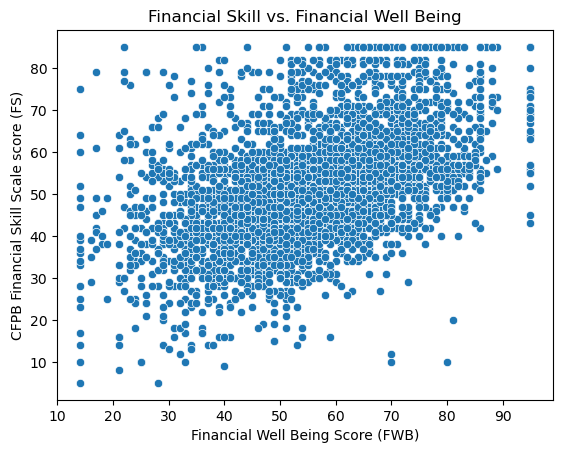

In [178]:
#plot to see if there is a correlationn between the Financial Well Being Score and the Financial Skill Scale Score
sns.scatterplot(data=gen_pop_key_columns, x="FWBscore", y="FSscore") 
plt.xlabel("Financial Well Being Score (FWB)")
plt.ylabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Skill vs. Financial Well Being")

Text(0.5, 1.0, 'Financial Skill vs. Financial Well Being')

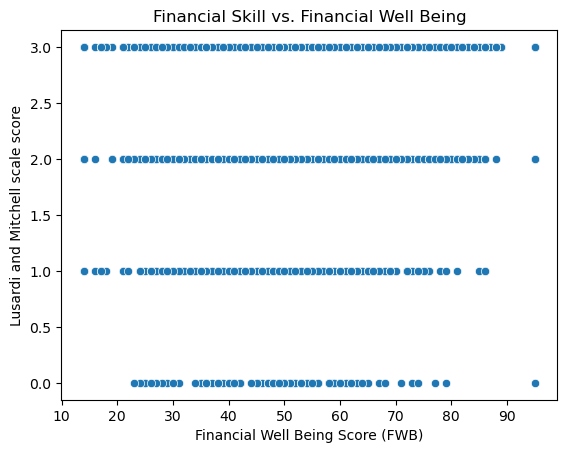

In [179]:
sns.scatterplot(data=gen_pop_key_columns, x="FWBscore", y="LMscore") 
plt.xlabel("Financial Well Being Score (FWB)")
plt.ylabel("Lusardi and Mitchell scale score")
plt.title("Financial Skill vs. Financial Well Being")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

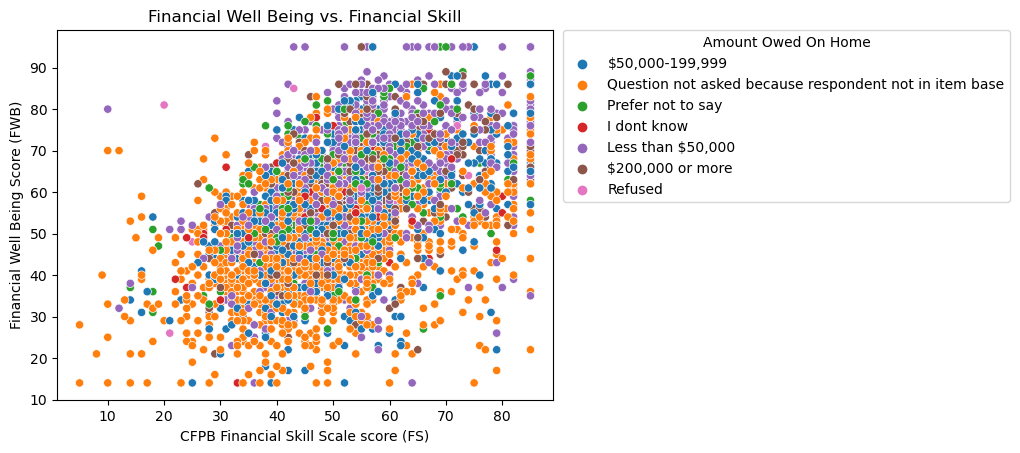

In [183]:
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="MORTGAGE")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title = "Amount Owed On Home")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

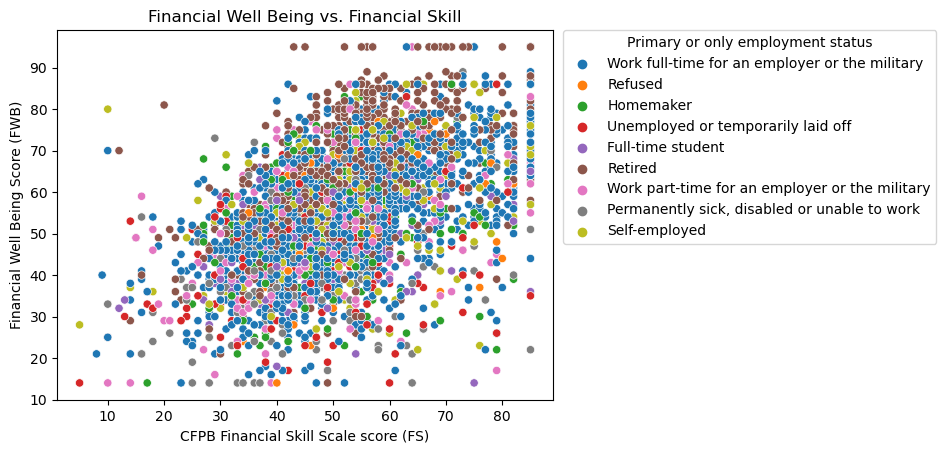

In [184]:
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="EMPLOY")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Primary or only employment status")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

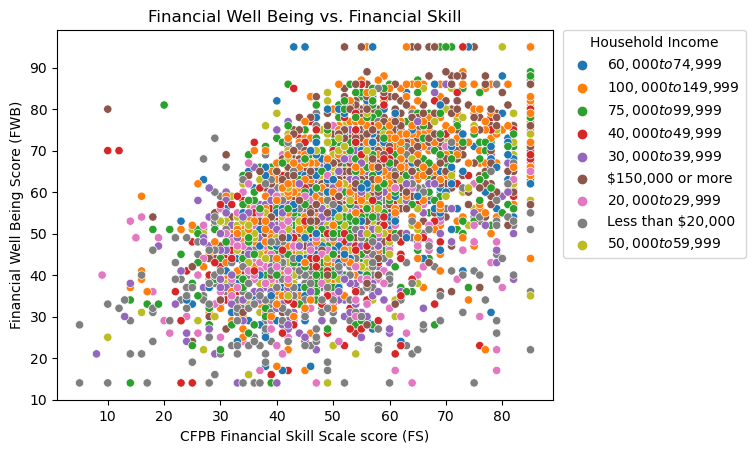

In [185]:
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="PPINCIMP")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Household Income")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

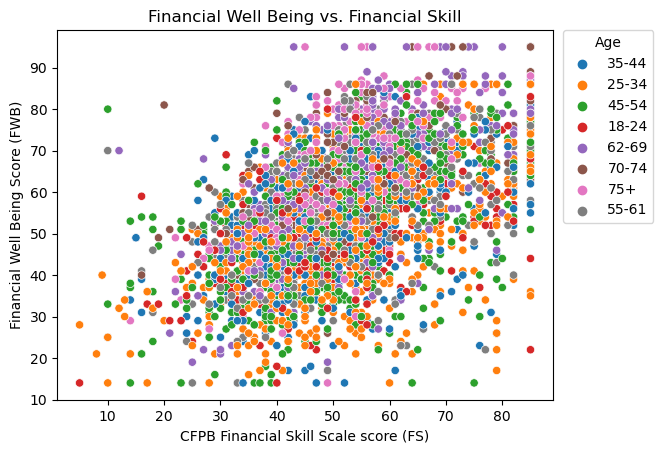

In [186]:
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="agecat")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Age")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

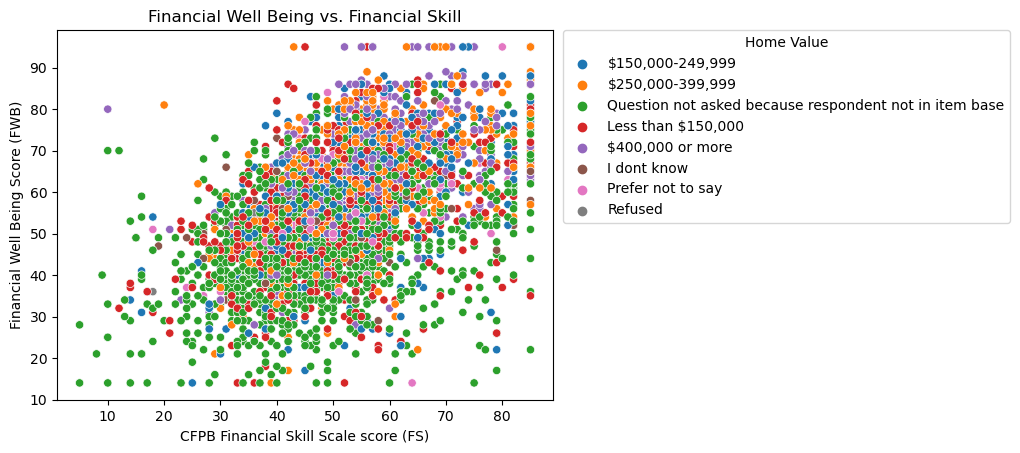

In [187]:
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="VALUERANGES")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title = "Home Value")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Financial Skill')

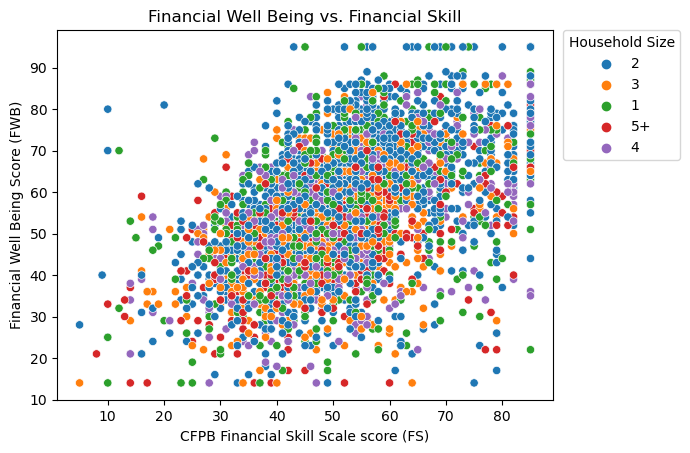

In [188]:
#PPHHSIZE
sns.scatterplot(data=gen_pop_key_columns, x="FSscore", y="FWBscore", hue="PPHHSIZE")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Household Size")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("CFPB Financial Skill Scale score (FS)")
plt.title("Financial Well Being vs. Financial Skill")

Text(0.5, 1.0, 'Financial Well Being vs. Household Size')

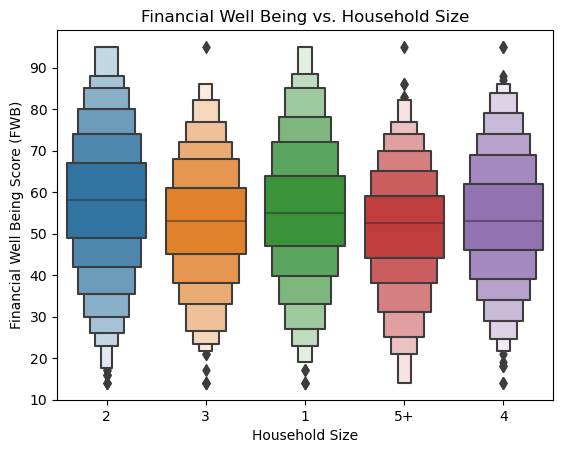

In [189]:
sns.boxenplot(data=gen_pop_key_columns, x="PPHHSIZE", y="FWBscore", scale="linear")
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("Household Size")
plt.title("Financial Well Being vs. Household Size")

Text(0.5, 1.0, 'Financial Well Being vs. Household Size')

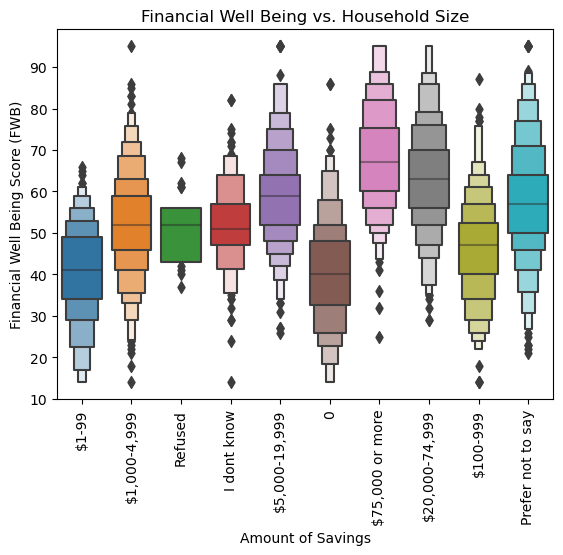

In [190]:
sns.boxenplot(data=gen_pop_key_columns, x="SAVINGSRANGES", y="FWBscore", scale="linear")
plt.xticks(rotation=90)
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("Amount of Savings")
plt.title("Financial Well Being vs. Household Size")

Text(0.5, 1.0, 'Financial Well Being vs. Amount Spent On Housing')

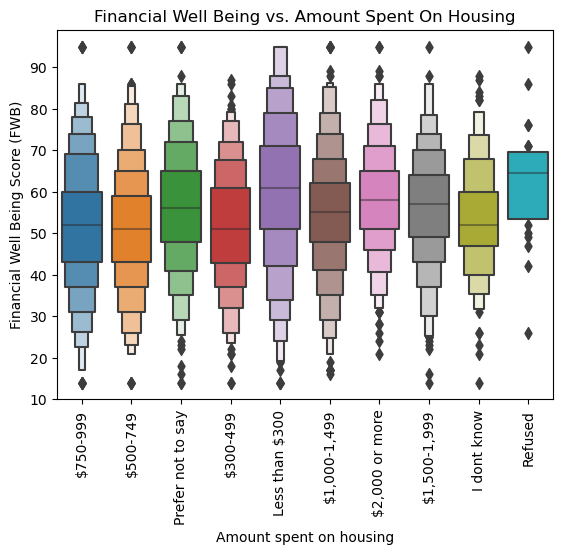

In [191]:
#HOUSERANGES is the average monthly amount spent on housing
sns.boxenplot(data=gen_pop_key_columns, x="HOUSERANGES", y="FWBscore", scale="linear")
plt.xticks(rotation=90)
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("Amount spent on housing")
plt.title("Financial Well Being vs. Amount Spent On Housing")

Text(0.5, 1.0, 'Financial Well Being vs. Home Value')

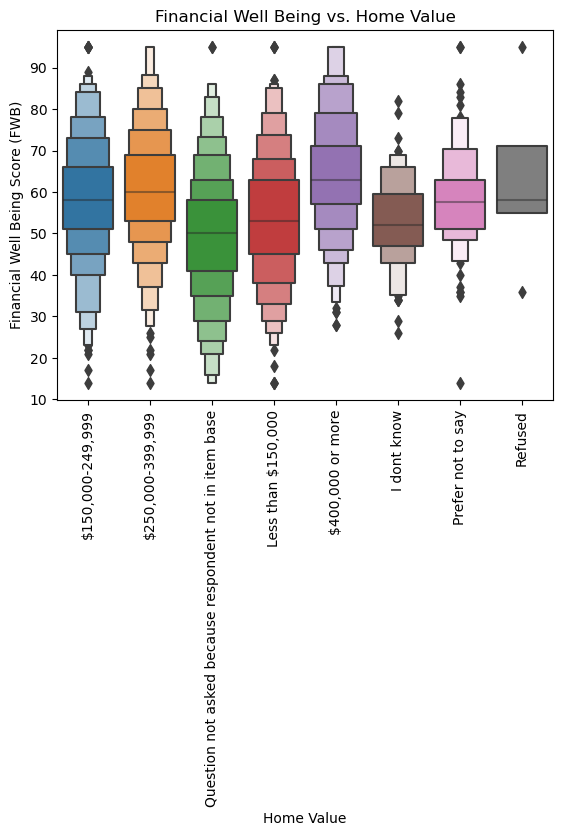

In [192]:
#VALUERANGES is the value of the respondents home
sns.boxenplot(data=gen_pop_key_columns, x="VALUERANGES", y="FWBscore", scale="linear")
plt.xticks(rotation=90)
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("Home Value")
plt.title("Financial Well Being vs. Home Value")

Text(0.5, 1.0, 'Financial Well Being vs. Amount owed on mortgage')

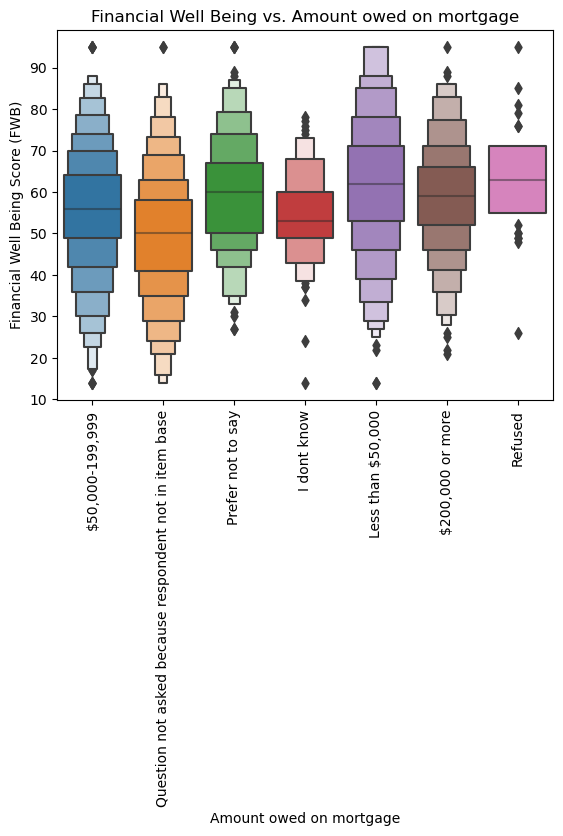

In [194]:
#MORTGAGE RANGES is the value of the respondents home
sns.boxenplot(data=gen_pop_key_columns, x="MORTGAGE", y="FWBscore", scale="linear")
plt.xticks(rotation=90)
plt.ylabel("Financial Well Being Score (FWB)")
plt.xlabel("Amount owed on mortgage")
plt.title("Financial Well Being vs. Amount owed on mortgage")

In [139]:
#column encoding
object_column_selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(sparse = False), object_column_selector),remainder='passthrough')
transformed = transformer.fit_transform(gen_pop_key_columns)

In [140]:
transformed.shape

(4993, 164)

In [141]:
encoded_gen_pop = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())

In [142]:
encoded_gen_pop.head()

,onehotencoder__ENDSMEET_Not at all difficult,onehotencoder__ENDSMEET_Refused,onehotencoder__ENDSMEET_Somewhat difficult,onehotencoder__ENDSMEET_Very difficult,onehotencoder__HOUSING_I do not currently own or rent,onehotencoder__HOUSING_I own my home,onehotencoder__HOUSING_I rent,onehotencoder__HOUSING_Refused,onehotencoder__LIVINGARRANGEMENT_I am the only adult in the household,onehotencoder__LIVINGARRANGEMENT_I live in my parents home,...,"onehotencoder__PPINCIMP_$75,000 to $99,999","onehotencoder__PPINCIMP_Less than $20,000",onehotencoder__PPMARIT_Divorced/Separated,onehotencoder__PPMARIT_Living with partner,onehotencoder__PPMARIT_Married,onehotencoder__PPMARIT_Never married,onehotencoder__PPMARIT_Widowed,remainder__FWBscore,remainder__FSscore,remainder__LMscore
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51.0,43.0,3.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,42.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,42.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,42.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,57.0,3.0


In [143]:
encoded_gen_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Columns: 164 entries, onehotencoder__ENDSMEET_Not at all difficult to remainder__LMscore
dtypes: float64(164)
memory usage: 6.2 MB


In [150]:
#Begin Modeling

#create testing and training sets
encoded_gen_pop_wo_target = encoded_gen_pop.drop(['remainder__FWBscore'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(encoded_gen_pop_wo_target, encoded_gen_pop['remainder__FWBscore'], random_state = 42)



In [151]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

selector_train_mse
selector_test_mse

80.34941148350775

In [152]:
selector_test_mse

80.34941148350775

In [153]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

In [154]:
print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])
Features from best selector: Index(['onehotencoder__ENDSMEET_Not at all difficult',
       'onehotencoder__ENDSMEET_Very difficult',
       'onehotencoder__ABSORBSHOCK_I am certain I could come up with the full $2,000',
       'onehotencoder__EMPLOY_Retired', 'remainder__FSscore'],
      dtype='object').
Coefficient values: 


,onehotencoder__ENDSMEET_Not at all difficult,onehotencoder__ENDSMEET_Very difficult,"onehotencoder__ABSORBSHOCK_I am certain I could come up with the full $2,000",onehotencoder__EMPLOY_Retired,remainder__FSscore
model,9.499163,-9.323582,6.315491,5.408094,0.266699


In [161]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [164]:
#Try another model:  This one took 2 hours to run :(

sequential_lasso_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso())),
                     ('model', Ridge())])

sequential_lasso_pipe.get_params().keys()
param_dict = {'selector__estimator__alpha': [1, 10, 0.1, 0.01]}
selector_grid_lasso = GridSearchCV(sequential_lasso_pipe, param_grid=param_dict)

selector_grid_lasso.fit(X_train, y_train)
train_preds_lasso = selector_grid_lasso.predict(X_train)
test_preds_lasso = selector_grid_lasso.predict(X_test)
selector_lasso_train_mse = mean_squared_error(y_train, train_preds_lasso)
selector_lasso_test_mse = mean_squared_error(y_test, test_preds_lasso)

In [165]:
best_estimator_lasso = selector_grid_lasso.best_estimator_
best_selector_lasso = best_estimator_lasso.named_steps['selector']
best_model_lasso = selector_grid_lasso.best_estimator_.named_steps['model']
feature_names_lasso = X_train.columns[best_selector_lasso.get_support()]
coefs_lasso = best_model_lasso.coef_

In [167]:
selector_lasso_test_mse

66.41120790701912

In [168]:
print(best_estimator_lasso)
print(f'Features from best selector: {feature_names_lasso}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs_lasso.T], columns = feature_names_lasso, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=Lasso(alpha=0.01))),
                ('model', Ridge())])
Features from best selector: Index(['onehotencoder__ENDSMEET_Not at all difficult',
       'onehotencoder__ENDSMEET_Very difficult',
       'onehotencoder__HOUSING_I own my home',
       'onehotencoder__LIVINGARRANGEMENT_Refused',
       'onehotencoder__HOUSERANGES_$1,000-1,499',
       'onehotencoder__HOUSERANGES_$2,000 or more',
       'onehotencoder__HOUSERANGES_$300-499',
       'onehotencoder__HOUSERANGES_$500-749',
       'onehotencoder__HOUSERANGES_Less than $300',
       'onehotencoder__HOUSERANGES_Refused',
       'onehotencoder__VALUERANGES_$250,000-399,999',
       'onehotencoder__VALUERANGES_$400,000 or more',
       'onehotencoder__VALUERANGES_I dont know',
       'onehotencoder__VALUERANGES_Prefer not to say',
       'onehotencoder__VALUERANGES_Question not asked because respondent not in item base',
       'onehotencoder__VALUERANGES

,onehotencoder__ENDSMEET_Not at all difficult,onehotencoder__ENDSMEET_Very difficult,onehotencoder__HOUSING_I own my home,onehotencoder__LIVINGARRANGEMENT_Refused,"onehotencoder__HOUSERANGES_$1,000-1,499","onehotencoder__HOUSERANGES_$2,000 or more",onehotencoder__HOUSERANGES_$300-499,onehotencoder__HOUSERANGES_$500-749,onehotencoder__HOUSERANGES_Less than $300,onehotencoder__HOUSERANGES_Refused,...,onehotencoder__PPGENDER_Female,onehotencoder__PPGENDER_Male,"onehotencoder__PPINCIMP_$100,000 to $149,999","onehotencoder__PPINCIMP_$150,000 or more","onehotencoder__PPINCIMP_$20,000 to $29,999","onehotencoder__PPINCIMP_$75,000 to $99,999","onehotencoder__PPINCIMP_Less than $20,000",onehotencoder__PPMARIT_Never married,remainder__FSscore,remainder__LMscore
model,7.205465,-6.55348,-0.024541,0.535063,0.072388,-1.443221,0.954621,0.666116,1.840912,-1.856529,...,0.402978,-0.402978,1.275829,2.199842,-1.498073,1.094788,-0.85078,-0.055306,0.210382,-0.143597


In [ ]:
#Looks like the following parameters have a positive influence on financial well being
#ENDSMEET not at all difficult, HOUSERANGES Less than $300, PPINCIMP $100k to $149k, PPINCMP $150K or more



Text(0.5, 1.0, 'FWB Score vs. Ends Meet')

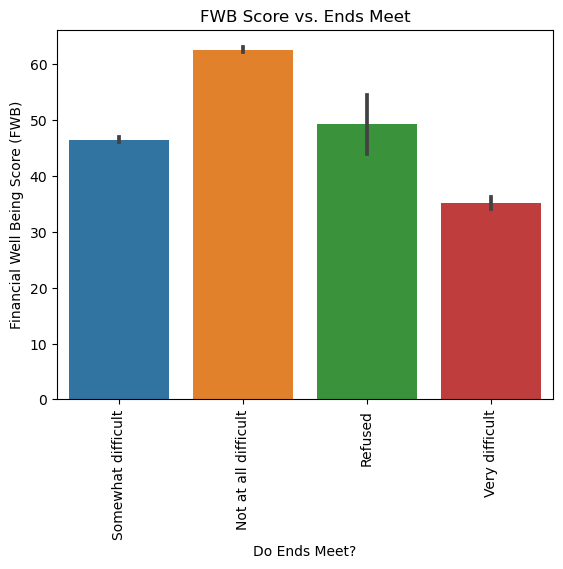

In [175]:
sns.barplot(data=gen_pop_key_columns, x='ENDSMEET', y='FWBscore')
plt.xticks(rotation=90)
plt.xlabel("Do Ends Meet?")
plt.ylabel("Financial Well Being Score (FWB)")
plt.title("FWB Score vs. Ends Meet")

Text(0.5, 1.0, 'FWB Score vs. Monthly Home Spending')

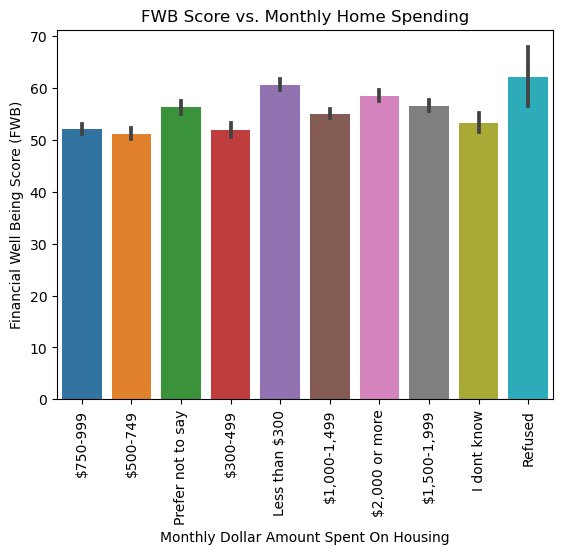

In [176]:
sns.barplot(data=gen_pop_key_columns, x='HOUSERANGES', y='FWBscore')
plt.xticks(rotation=90)
plt.xlabel("Monthly Dollar Amount Spent On Housing")
plt.ylabel("Financial Well Being Score (FWB)")
plt.title("FWB Score vs. Monthly Home Spending")

Text(0.5, 1.0, 'FWB Score vs. Household Income')

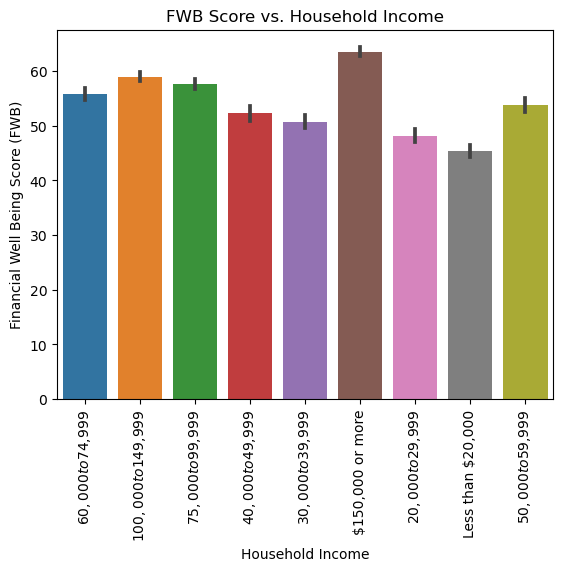

In [177]:
sns.barplot(data=gen_pop_key_columns, x='PPINCIMP', y='FWBscore')
plt.xticks(rotation=90)
plt.xlabel("Household Income")
plt.ylabel("Financial Well Being Score (FWB)")
plt.title("FWB Score vs. Household Income")